In [84]:
###   load the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

###   set some configurations for plots
plt.rcParams['figure.figsize'] = (24,18)
pd.set_option('display.max_columns', None)

In [85]:
###   read in the data files
path = r'C:\Users\eight\Desktop\Kelvin HDD\3. Coursera\A. Projects\6. Predict future sales --- Kaggle\competitive-data-science-predict-future-sales'
os.chdir(path)

item_cat = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
shops = pd.read_csv("shops.csv")
sales_train = pd.read_csv("sales_train.csv")
sales_test = pd.read_csv("test.csv")
df = sales_train.copy()
df.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [86]:
###   take a look at a sample of the files
print(item_cat.head())
print(items.head())
print(shops.head())
print(sales_train.head())
print(sales_train.tail())
print(sales_test.head())

        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"  

In [87]:
# convert 'date' column into type "datetime"
df.date = pd.to_datetime(df.date, format = "%d.%m.%Y")
df.dtypes
print(df.head(10))

        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154      999.00           1.0
1 2013-01-03               0       25     2552      899.00           1.0
2 2013-01-05               0       25     2552      899.00          -1.0
3 2013-01-06               0       25     2554     1709.05           1.0
4 2013-01-15               0       25     2555     1099.00           1.0
5 2013-01-10               0       25     2564      349.00           1.0
6 2013-01-02               0       25     2565      549.00           1.0
7 2013-01-04               0       25     2572      239.00           1.0
8 2013-01-11               0       25     2572      299.00           1.0
9 2013-01-03               0       25     2573      299.00           3.0


In [88]:
###   create a function to obtain the month info
def create_period(df):
    
    get_mth = lambda x: x.strftime('%m')
    df['mth'] = df.date.apply(get_mth)
    df.mth = df.mth.astype('int64')
    
    return df

In [89]:
# create month info 
df_period = create_period(df)
df_period.shape
df_period.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,mth
0,2013-01-02,0,59,22154,999.00,1.0,1
1,2013-01-03,0,25,2552,899.00,1.0,1
2,2013-01-05,0,25,2552,899.00,-1.0,1
3,2013-01-06,0,25,2554,1709.05,1.0,1
4,2013-01-15,0,25,2555,1099.00,1.0,1


In [90]:
# we attempt to find the mean price for each 'shop_id' and 'item_id' pair
# we then attempt to calculate the counts of prices that exceed mean and beneath mean these will be used as features
mean_prices_df = df.loc[:,['shop_id','item_id','item_price']].groupby(['shop_id','item_id']).mean().reset_index()
mean_prices_df.head()

df_with_mean = df_period.merge(mean_prices_df, how = 'left', on = ['shop_id', 'item_id'])
df_with_mean['above_mean'] = np.where(df_with_mean.item_price_x > df_with_mean.item_price_y, 1, 0)
df_with_mean['below_mean'] = np.where(df_with_mean.item_price_x < df_with_mean.item_price_y, 1, 0)
df_with_mean['at_mean'] = np.where(df_with_mean.item_price_x == df_with_mean.item_price_y, 1, 0)
df_with_mean.head(10)

,date,date_block_num,shop_id,item_id,item_price_x,item_cnt_day,mth,item_price_y,above_mean,below_mean,at_mean
0,2013-01-02,0,59,22154,999.00,1.0,1,999.000000,0,0,1
1,2013-01-03,0,25,2552,899.00,1.0,1,899.000000,0,0,1
2,2013-01-05,0,25,2552,899.00,-1.0,1,899.000000,0,0,1
3,2013-01-06,0,25,2554,1709.05,1.0,1,1709.050000,0,0,1
4,2013-01-15,0,25,2555,1099.00,1.0,1,1104.000000,0,1,0
5,2013-01-10,0,25,2564,349.00,1.0,1,332.333333,1,0,0
6,2013-01-02,0,25,2565,549.00,1.0,1,549.000000,0,0,1
7,2013-01-04,0,25,2572,239.00,1.0,1,293.000000,0,1,0
8,2013-01-11,0,25,2572,299.00,1.0,1,293.000000,1,0,0
9,2013-01-03,0,25,2573,299.00,3.0,1,257.333333,1,0,0


In [91]:
# we rename the columns
df_with_mean = df_with_mean.rename({'item_price_x': 'item_price', 'item_price_y': 'mean_item_price'}, axis = 1)
df_with_mean.head()
df_with_mean.shape

(2935849, 11)

In [92]:
# create the pivot table dataframe
val = ['item_cnt_day']
cols = ['date_block_num']
ind = ['shop_id','item_id']
price_ind = ['above_mean', 'below_mean', 'at_mean', 'item_price', 'mean_item_price']

pivot_df = df_with_mean.pivot_table(index = ind + ['mth'] + price_ind, 
									values = val[0], columns = cols[0], 
									aggfunc = 'sum').fillna(0.0).reset_index()

pivot_df.head()
pivot_df.shape

(1640236, 42)

In [93]:
# create dataframe (1) for the 'mth' using 'max'
pivot_df1 = pivot_df.loc[:,ind + ['mth', 'item_price'] + list(range(0,34))].groupby(ind).max().reset_index()
pivot_df1.head()
pivot_df1.shape

# create dataframe (2) for the 'prices' columns, using 'sum'
pivot_df2 = pivot_df.loc[:,ind + price_ind + list(range(0,34))].groupby(ind).sum().reset_index()
pivot_df2.head()
pivot_df2.shape

# merge both the pivot dataframes together
df2 = pd.concat([pivot_df2, pivot_df1.mth], axis = 1)

# reorder the columns
[(i, df2.columns[i]) for i in range(df2.shape[1])]
col_order_df2 = list(range(0,7)) + [41] + list(range(7, 41))
df2 = df2.iloc[:, col_order_df2]
df2.head()
df2.shape

(424124, 42)

In [94]:
# merge in all the relevant info into the earlier "df" for completeness and for ML
df3 = pd.merge(df2, items, how = "inner", on = "item_id")
df3.head()
df3.shape

# note that the 'item_category_id' will be assigned to '0' if the item doesnt exist
# so we need to change current category '0' to be a different number, e.g. '99'
item_cat.item_category_id[0] = 99
item_cat.head()
df4 = pd.merge(df3, item_cat, how = "inner", on = "item_category_id")
df4.head()

# continue to merge dataframes
df5 = pd.merge(df4, shops, how = "inner", on = "shop_id")
df5.head()
df5.shape

C:\Users\eight\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(424121, 46)

In [95]:
df5.isna().sum() # there are no NAs

shop_id               0
item_id               0
above_mean            0
below_mean            0
at_mean               0
item_price            0
mean_item_price       0
mth                   0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
10                    0
11                    0
12                    0
13                    0
14                    0
15                    0
16                    0
17                    0
18                    0
19                    0
20                    0
21                    0
22                    0
23                    0
24                    0
25                    0
26                    0
27                    0
28                    0
29                    0
30                    0
31                    0
32                    0
33              

In [96]:
# we change the order of the columns
[(i, df5.columns[i]) for i in range(df5.shape[1])]
col_order = [0,1,43] + list(range(2,8)) + list(range(8,42))

df6 = df5.iloc[:,col_order]
df6.head()
df6.shape

(424121, 43)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BBA532048>,
      dtype=object)

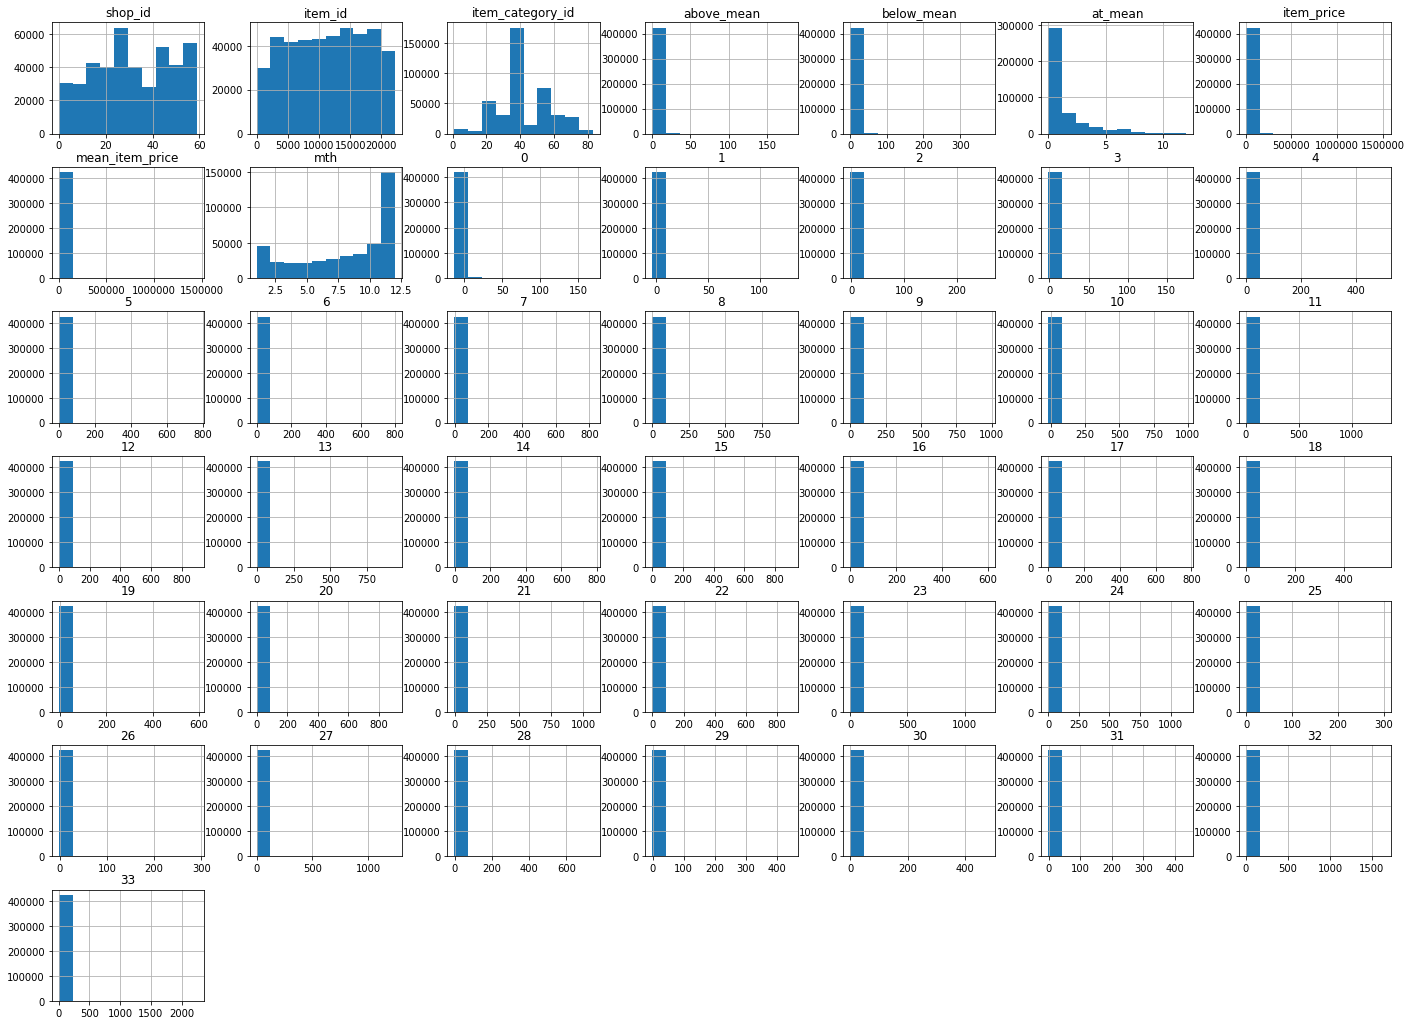

In [97]:
###   create some visualisations
df6.hist()

In [108]:
###############################################################################
###   create a machine learning model
###############################################################################

# using all data to predict 'item_price' given that 'date_block_num' is 34
# we insert the price info as a row, mth as 11, 
# then use the predicted item price to predict the item count for the month
X = df6.loc[:,df6.columns != 33]
X = X.drop(['mean_item_price', 'item_price'], axis = 1)
y = df6.loc[:,df6.columns == 33]
print(X.tail(50))
print(y.head())

# create an XGBoost model
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data = X, label = y)

# do a train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
xg_reg = xgb.XGBRegressor(num_round = 1000, 
                          verbosity = 0, # silent all warning messages                          
                          eval_metric = 'rmse', 
                          min_child_weight = 0.5, 
                          eta = 0.1, # something like learning rate
                          seed = 100,                          
                          max_depth = 10, # increasing this value makes model more complex
                          n_estimators = 200)

xg_reg.fit(X_train, y_train)

        shop_id  item_id  item_category_id  above_mean  below_mean  at_mean  \
424071       55    20010                31           0           0        4   
424072       55    20011                31           0           0        4   
424073       55    20012                31           0           0        5   
424074       55    20016                31          10           1        0   
424075       55    20025                31           0           0        5   
424076       55    20956                31           8           3        0   
424077       55    21504                31           0           0        4   
424078       55    21505                31           0           0        6   
424079       55    21506                31           0           0        9   
424080       55    21778                31           0           0        1   
424081       55    21779                31           0           0        1   
424082       55    21781                31          

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=0.5, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, num_round=1000, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, silent=None, subsample=1, verbosity=0)

In [109]:
y_preds = xg_reg.predict(X_test)
print(y_preds)

[ 4.2843223e-03 -6.4904094e-03 -1.0036707e-02 ...  4.6153963e-03
 -2.2172928e-05 -4.0663481e-03]


In [110]:
# we measure the accuracy using RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pd.DataFrame(y_preds)))
print(rmse)

1.0414260259202124


In [111]:
# this is based on the merged data with the 'sales_test' dataframe
test_df = sales_test.merge(df6, how = 'left', on = ['shop_id', 'item_id']).fillna(0.0)
test_df.head()

# reorder the columns again, and dropping less important columns
[(i,test_df.columns[i]) for i in range(len(test_df.columns))]
col_order_test = [1,2,3,4,5,6,9] + list(range(10,44))
test_df = test_df.iloc[:,col_order_test]

# # previously we fitted the model without one column, 
# # so, now we want to predict the 34th column, so we move one month forward
# # i.e. from 1 to 33 (including renaming the column names)
dic_names = dict(zip(test_df.columns[7:], list(np.array(list(test_df.columns[7:])) - 1)))
test_df = test_df.rename(dic_names, axis = 1)
print(test_df.columns)
print(X.columns)

# test_df_select = test_df.iloc[:,test_df.columns != -1]
test_df_select.head()
test_df_select.above_mean.value_counts()

# # # the final prediction
y_preds_test = xg_reg.predict(test_df_select)

Index([         'shop_id',          'item_id', 'item_category_id',
             'above_mean',       'below_mean',          'at_mean',
                    'mth',                 -1,                  0,
                        1,                  2,                  3,
                        4,                  5,                  6,
                        7,                  8,                  9,
                       10,                 11,                 12,
                       13,                 14,                 15,
                       16,                 17,                 18,
                       19,                 20,                 21,
                       22,                 23,                 24,
                       25,                 26,                 27,
                       28,                 29,                 30,
                       31,                 32],
      dtype='object')
Index([         'shop_id',          'item_id', 'item_catego

In [112]:
# we clip the predictions to a range between 0 to 20
clipped_preds = list(map(lambda x: min(20, max(x,0)), list(y_preds_test)))
results = pd.DataFrame({'ID': test_df.index, 'item_cnt_month': clipped_preds})

results.head(20)
results.shape

(214200, 2)

In [113]:
# read into the submission file
results.describe()
results.to_csv('try.csv')